In [3]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
from scipy import stats

In [6]:
from pylab import rcParams

In [7]:
%matplotlib inline


In [8]:
sns.set(style='whitegrid', palette='muted', font_scale=1)

In [9]:
rcParams['figure.figsize'] = 10, 5

In [10]:
RANDOM_SEED = 42
LABELS = ["Legit", "Fraud"]

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Read Data
df = pd.read_csv('/Users/shashi/Documents/Capstone projects/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [15]:
# Label the class
fraud = df[df.Class == 1]
legit = df[df.Class == 0]

In [16]:
# Describe Data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [17]:
# Print data columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [18]:
# Check missing data values
df.isnull().values.any()

False

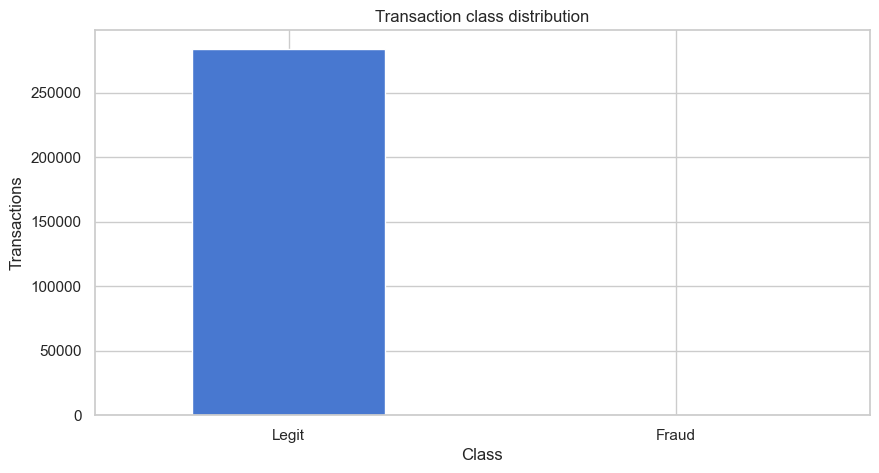

In [19]:
# Display a countplot
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Transactions");

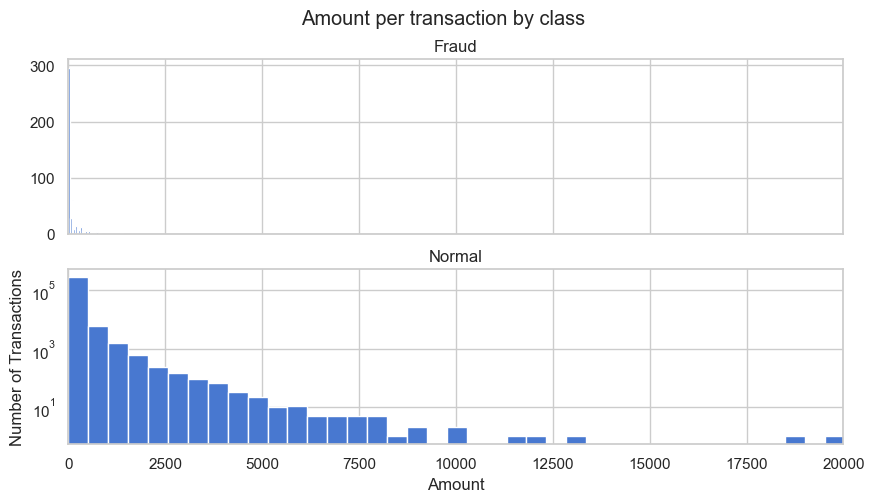

In [20]:
# Display a histogram
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(legit.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

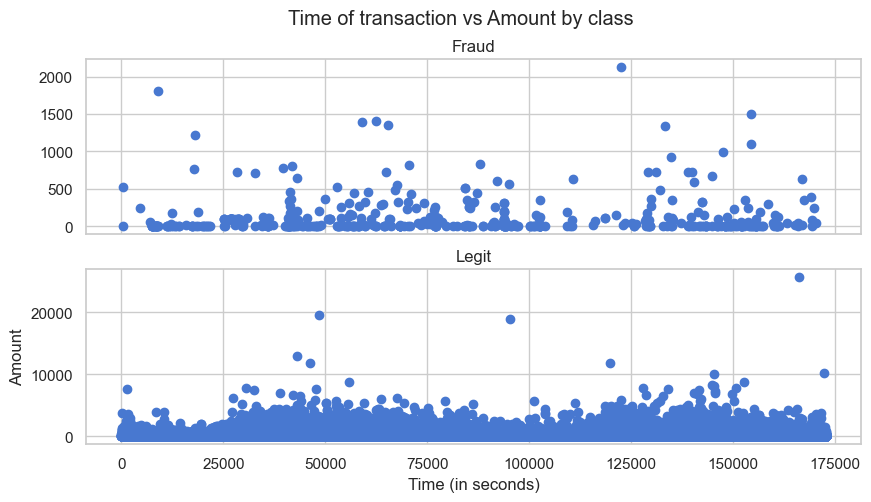

In [21]:
# Display a scatter plot
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Legit')

plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()


In [22]:
# Transactions count on amount
amount_more = 0
amount_less = 0

for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"] < 2500):
        amount_less += 1
    else:
        amount_more += 1

print(amount_more)
print(amount_less)

449
284358


In [23]:
percentage_less = (amount_less/df.shape[0])*100
percentage_less

99.84234938045763

In [24]:
# Classified transactions
frd = 0
lgt = 1

for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"]<2500):
        if(df.iloc[i]["Class"] == 0):
            lgt += 1
        else:
            frd+=1

print(frd)
print(lgt)

492
283867


In [25]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [26]:
# Remove time column
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [27]:
# Train auto encoder
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [28]:
X_train.shape

(227451, 29)

In [29]:
input_dim = X_train.shape[1]
encoding_dim = 14

In [30]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [34]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath= "trained_model_h5.keras",
                               verbose=0,
                               save_best_only=True)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 6s 747us/step - accuracy: 0.4942 - loss: 0.8786 - val_accuracy: 0.6407 - val_loss: 0.7847
Epoch 2/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 739us/step - accuracy: 0.6408 - loss: 0.7377 - val_accuracy: 0.6581 - val_loss: 0.7667
Epoch 3/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 731us/step - accuracy: 0.6539 - loss: 0.7164 - val_accuracy: 0.6627 - val_loss: 0.7618
Epoch 4/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 727us/step - accuracy: 0.6576 - loss: 0.7220 - val_accuracy: 0.6610 - val_loss: 0.7629
Epoch 5/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 730us/step - accuracy: 0.6619 - loss: 0.7429 - val_accuracy: 0.6631 - val_loss: 0.7583
Epoch 6/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 733us/step - accuracy: 0.6655 - loss: 0.7114 - val_accuracy: 0.6648 - val_loss: 0.7566
Epoch 7/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 728us/step - accuracy: 0.6697 - loss: 0.7079 - val_accuracy: 0.6734 - val_loss: 0.7590
Epoch 8/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 725us/step - accuracy: 

Epoch 50/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 718us/step - accuracy: 0.6900 - loss: 0.7068 - val_accuracy: 0.6896 - val_loss: 0.7489
Epoch 51/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 728us/step - accuracy: 0.6906 - loss: 0.7230 - val_accuracy: 0.6932 - val_loss: 0.7457
Epoch 52/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 731us/step - accuracy: 0.6923 - loss: 0.7033 - val_accuracy: 0.6934 - val_loss: 0.7484
Epoch 53/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 717us/step - accuracy: 0.6889 - loss: 0.7157 - val_accuracy: 0.6952 - val_loss: 0.7458
Epoch 54/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 751us/step - accuracy: 0.6905 - loss: 0.7047 - val_accuracy: 0.6875 - val_loss: 0.7493
Epoch 55/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 749us/step - accuracy: 0.6925 - loss: 0.7085 - val_accuracy: 0.6856 - val_loss: 0.7470
Epoch 56/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 727us/step - accuracy: 0.6893 - loss: 0.7192 - val_accuracy: 0.6915 - val_loss: 0.7473
Epoch 57/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 747us/step - ac

Epoch 99/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 720us/step - accuracy: 0.6891 - loss: 0.7163 - val_accuracy: 0.6958 - val_loss: 0.7455
Epoch 100/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 5s 724us/step - accuracy: 0.6893 - loss: 0.7183 - val_accuracy: 0.6918 - val_loss: 0.7449


In [36]:
# Load the model to autoencoder
autoencoder = load_model('trained_model_h5.keras')

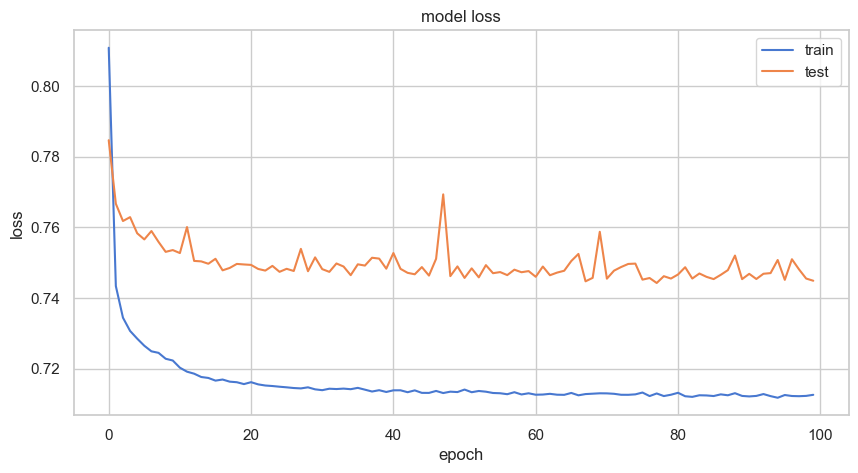

In [37]:
# Display a line chart
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [38]:
# Predict the autoencoder error
predictions = autoencoder.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 269us/step


In [39]:
# Classify as the reconstruction error
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [40]:
# Describe the error data
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.735730,0.001720
std,3.409147,0.041443
min,0.047159,0.000000
25%,0.237586,0.000000
50%,0.391288,0.000000
75%,0.622241,0.000000
max,253.064451,1.000000


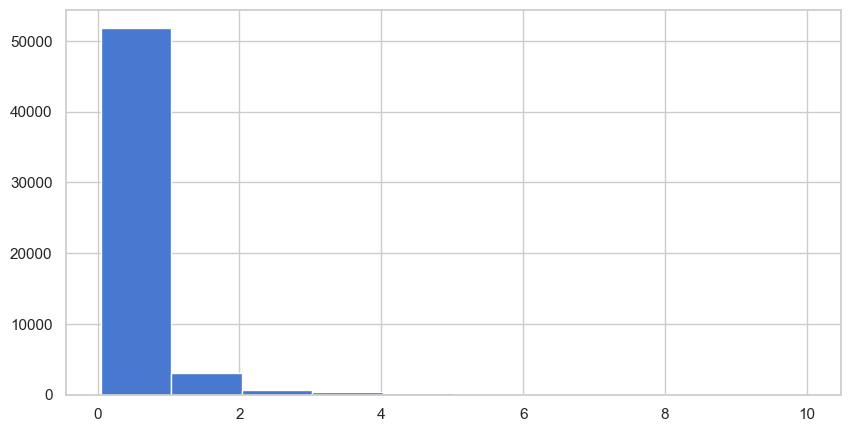

In [41]:
# Display a bar chart
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

In [42]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

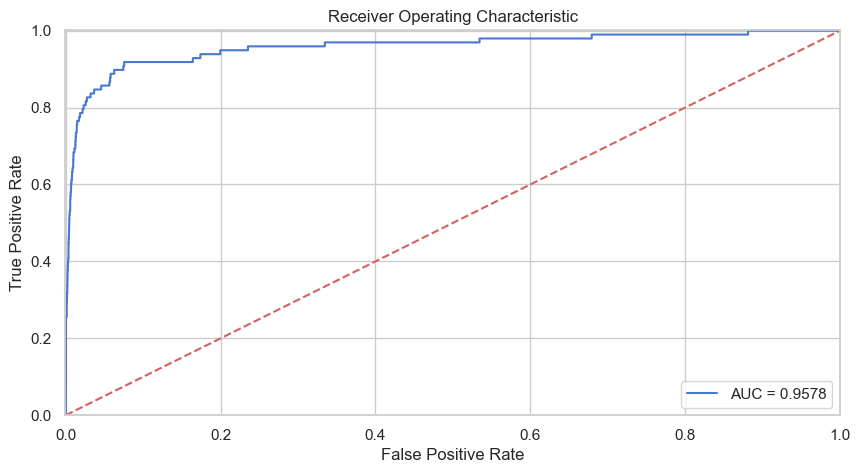

In [43]:
# Generate an ROC curve
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [44]:
# Create Train and Test Data in ratio 70:30
X = df.drop(labels='Class', axis=1) # Features
y = df.loc[:,'Class']               # Target Variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

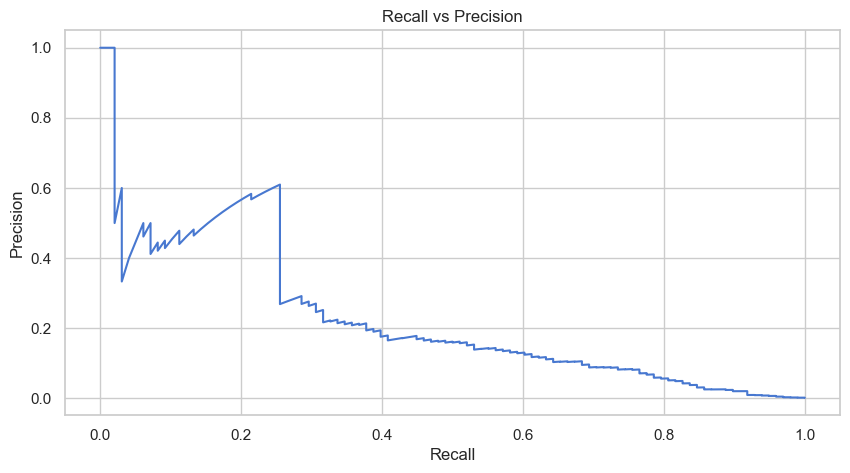

In [45]:
# Display Line plot - recall vs precision
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

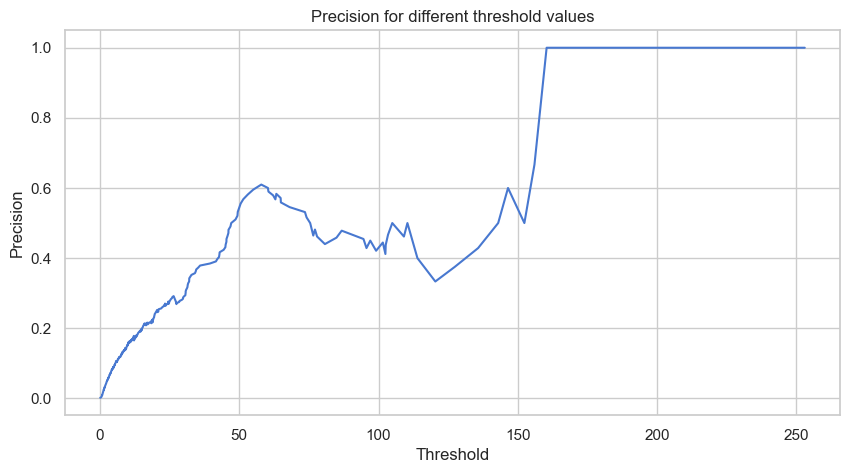

In [46]:
# Display line plot - precision
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

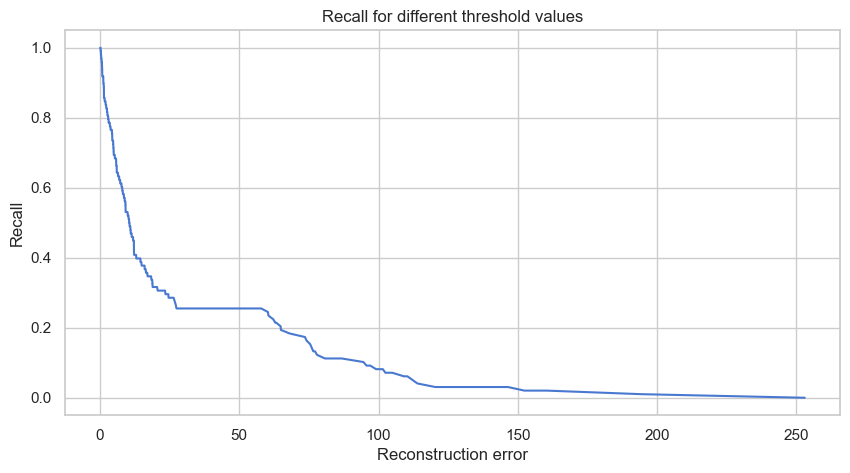

In [47]:
# Display line plot - recall
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [48]:
# Set threshold
threshold = 3.1

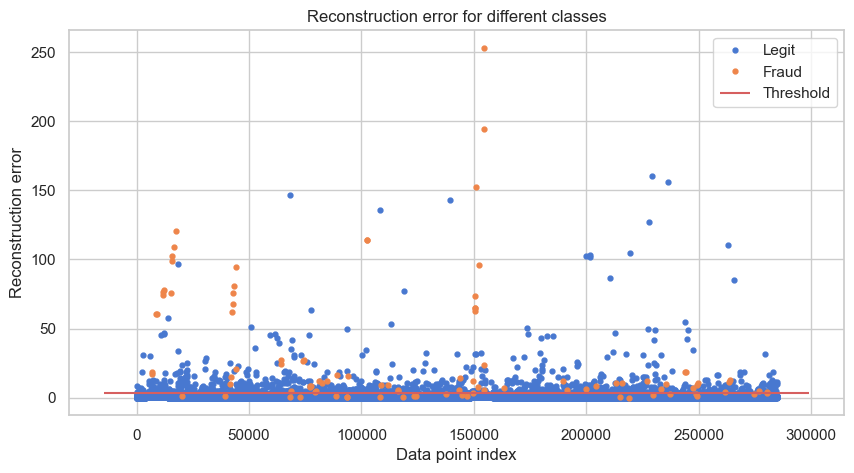

In [49]:
# Display scatter plot - error reconstruction
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Legit")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

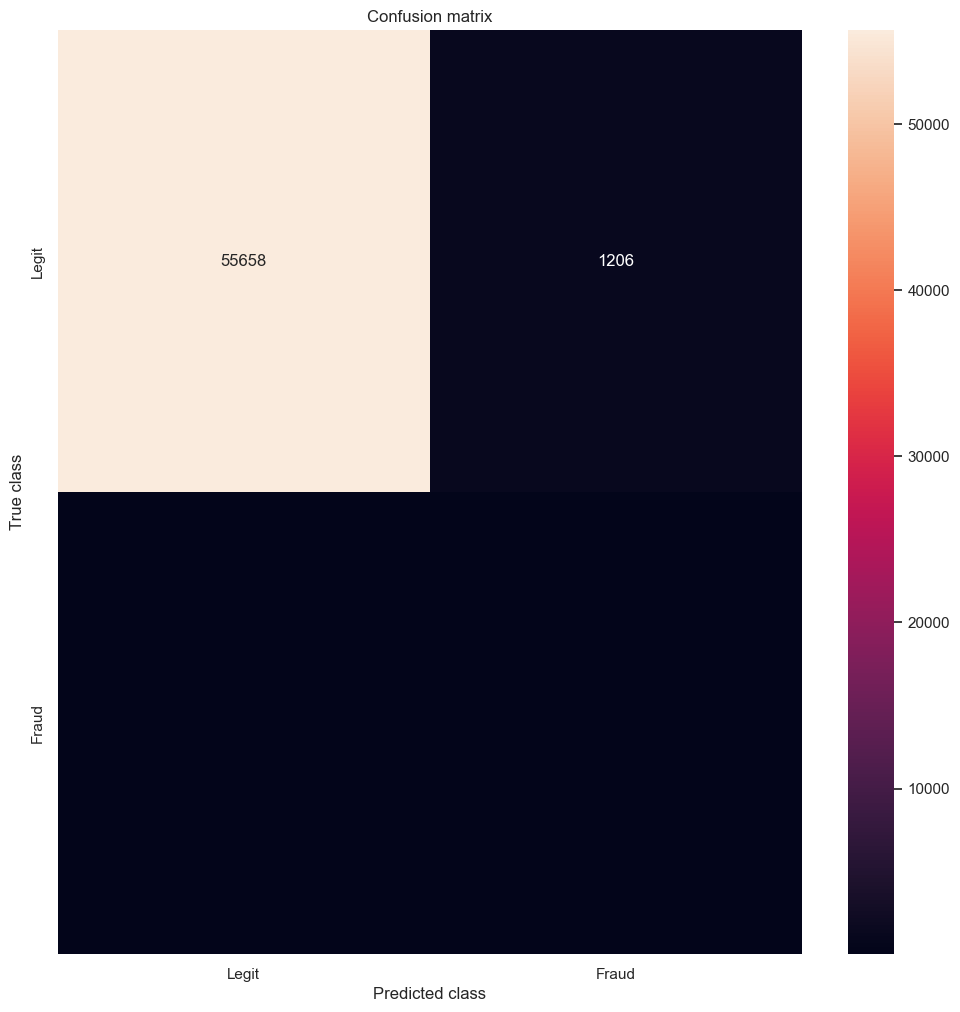

In [50]:
# Display heat map - confusion matrix
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()